In [1]:
%matplotlib inline


# Visualizations with Display Objects


.. currentmodule:: sklearn.metrics

In this example, we will construct display objects,
:class:`ConfusionMatrixDisplay`, :class:`RocCurveDisplay`, and
:class:`PrecisionRecallDisplay` directly from their respective metrics. This
is an alternative to using their corresponding plot functions when
a model's predictions are already computed or expensive to compute. Note that
this is advanced usage, and in general we recommend using their respective
plot functions.


In [2]:
print(__doc__)

Automatically created module for IPython interactive environment


Load Data and train model
-------------------------
For this example, we load a blood transfusion service center data set from
`OpenML <https://www.openml.org/d/1464>`. This is a binary classification
problem where the target is whether an individual donated blood. Then the
data is split into a train and test dataset and a logistic regression is
fitted wtih the train dataset.



In [15]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=0))])

Create :class:`ConfusionMatrixDisplay`
#############################################################################
 With the fitted model, we compute the predictions of the model on the test
 dataset. These predictions are used to compute the confustion matrix which
 is plotted with the :class:`ConfusionMatrixDisplay`



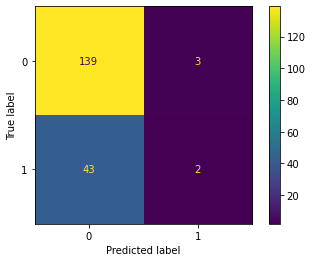

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Create :class:`RocCurveDisplay`
#############################################################################
 The roc curve requires either the probabilities or the non-thresholded
 decision values from the estimator. Since the logistic regression provides
 a decision function, we will use it to plot the roc curve:



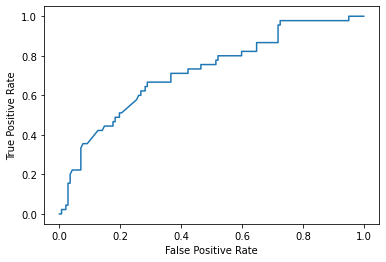

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Create :class:`PrecisionRecallDisplay`
#############################################################################
 Similarly, the precision recall curve can be plotted using `y_score` from
 the prevision sections.



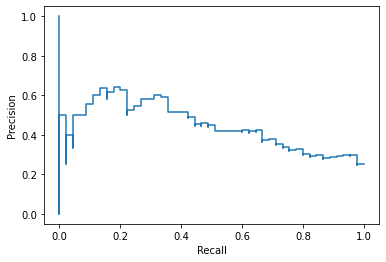

In [6]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score,
                                         pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

Combining the display objects into a single plot
#############################################################################
 The display objects store the computed values that were passed as arguments.
 This allows for the visualizations to be easliy combined using matplotlib's
 API. In the following example, we place the displays next to each other in a
 row.



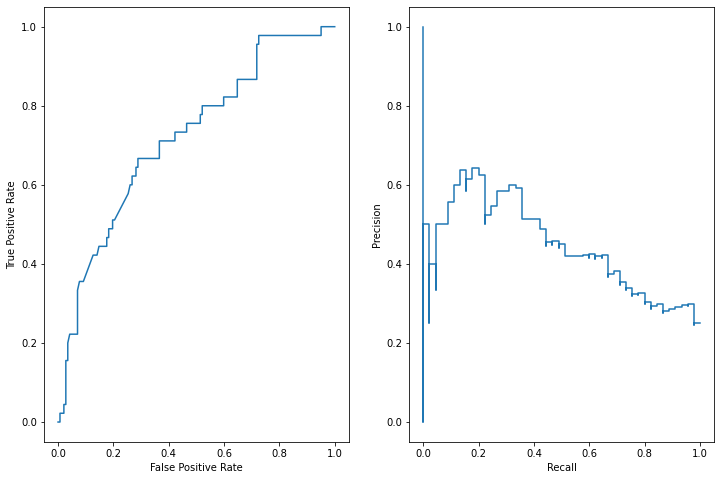

In [7]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()